# Flower classification

*Using the dataset relative to iris flowers species available on kaggle.com*
*https://www.kaggle.com/arshid/iris-flower-dataset*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
raw_data=pd.read_csv('IRIS.csv')

In [6]:
raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
raw_data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


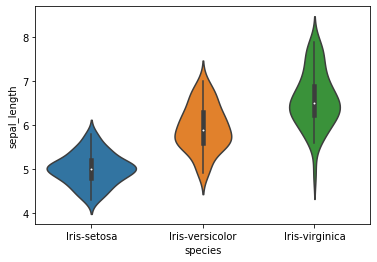

In [15]:
#sns.boxplot(data=raw_data, x=['sepal_length'], hue='species')
sns.violinplot(data=raw_data, y='sepal_length', x='species')

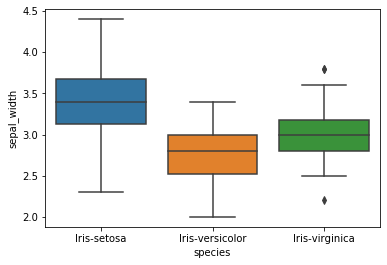

In [16]:
sns.boxplot(data=raw_data, y='sepal_width', x='species')

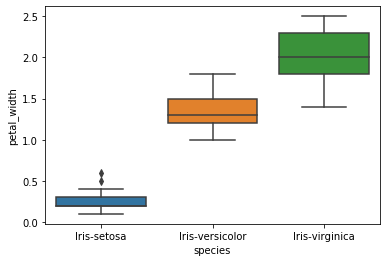

In [17]:
sns.boxplot(data=raw_data, y='petal_width', x='species')

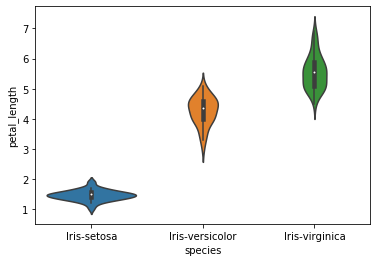

In [19]:
sns.violinplot(data=raw_data, y='petal_length', x='species')

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X=raw_data[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
y=raw_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=86272)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train, y_train)

/home/barbara/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/barbara/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions=model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.90      0.95        20
 Iris-virginica       0.89      1.00      0.94        17

       accuracy                           0.96        50
      macro avg       0.96      0.97      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [30]:
from sklearn.model_selection import cross_validate

In [38]:
cv_results=cross_validate(model, X, y, cv=5, verbose=1,return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/barbara/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/barbara/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/barbara/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/barbara/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/

In [39]:
cv_results


{'fit_time': array([0.0092783 , 0.00857854, 0.01115084, 0.01301241, 0.00833488]),
 'score_time': array([0.00336456, 0.00143743, 0.00146627, 0.00135732, 0.00137019]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [40]:
from sklearn.svm import SVC

In [42]:
model2=SVC()

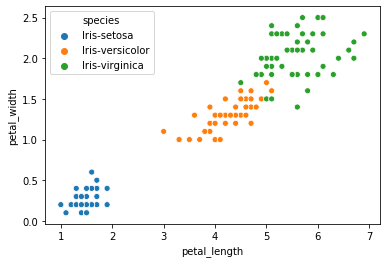

In [46]:
sns.scatterplot(data=raw_data, x='petal_length', y='petal_width', hue='species')

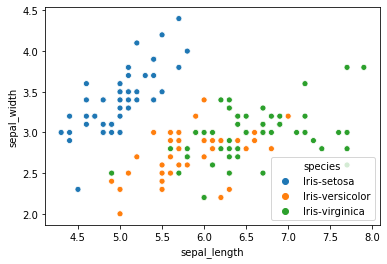

In [47]:
sns.scatterplot(data=raw_data, x='sepal_length', y='sepal_width', hue='species')

In [44]:
model2.fit(X_train, y_train)

/home/barbara/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
predictions2=model2.predict(X_test)

In [49]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.90      0.95        20
 Iris-virginica       0.89      1.00      0.94        17

       accuracy                           0.96        50
      macro avg       0.96      0.97      0.96        50
   weighted avg       0.96      0.96      0.96        50

